# Neural Networks with TensorFlow

Creación y uso de neural networks para clasificar artículos de ropa usando el módulo *Keras* de del Framework TensorFlow.

En este ejemplo crearemos una DNN, la entrenaremos con imágenes de ropa de un conjunto de datos para, después, darle a la red neuronal una imagen y que nos la clasifique dentro de las categorías de ropa posibles.

In [25]:
# Instalación de TensorFlow 2.0 y los módulos Tensorflow & Keras
%tensorflow_version 2.x  
import tensorflow as tf
from tensorflow import keras

# Librerías de ayuda
import numpy as np # arrays
import matplotlib.pyplot as plt # gráficas

### Datos  
MNIST Fashion Dataset incluido en el módulo de Keras está compuesto de imágenes 60000 imágenes de artículos de ropa para entrenar el modelo y unas 10000 imágenes para validación/testeo del modelo.

In [27]:
fashion_mnist = keras.datasets.fashion_mnist # Carga del Dataset
# separa el Dataset en datos de entrenamiento vs datos de evaluación del modelo
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape # 60000 imágenes de 28 x 28 pixels

(60000, 28, 28)

In [5]:
train_images[0,23,23] # Accedemos a un pixel
# El valor se encuentra entre 0 (negro) y 255 blanco. 
# Representa imágenes en escala de grises.
# La librería podría, en otras ocasiones, devolver 3 valores en lugar de 1-> R,G,B

194

In [6]:
train_labels[:10] # Miramos los datos de las primeras 10 labels de los datos de entrenamiento del modelo
# Vemos que son números enteros de 0-9. Cada nº representa un tipo de prenda de ropa.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [28]:
# creamos nombres para cada etiqueta para saber cuál es cuál
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

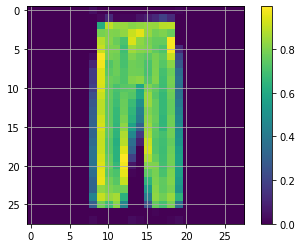

In [40]:
# DUDA:  De dónde salen los colores -> En lugar de en escala de grises se muestra desde azul a verde, pero es lo mismo.

# Veamos uno de los datos de entrenamiento
plt.figure()
plt.imshow(train_images[21]) # CÁMBIAME! :d
plt.colorbar()
plt.grid(True)
plt.show()

Pre-Procesamiento de los Datos

In [29]:
# Preprocesamos los datos, dividiéndolos entre 255 para que los valores se
# encuentren entre 0-255. El modelo trabaja mejor con valores cercanos a 1.
# MOVER A TEORÍA
# Esto es así porque los weigths aleatorios con los que comienza el modelo 
# valen entre 0-1, si le damos valores a las primeras neuronas entre 0-255
# introduce mucho ruido en los cálculos y retrasa la optimización del modelo
# Dificultando la clasificación de las imágenes.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Es muy importante pre procesar de la misma manera tanto los datos de entrenamiento
# como los datos de evaluación del modelo.

## Definición de la Arquitectura de la Red Neuronal 
Modelo que usaremos: Keras Sequential Model  
Tipo de modelo: Feed-forward (pasa valores de izquierda a derecha)  

PASAR A TEORÍA con la lista de hyperparametros
_Hyper Parameter Tunning_: El ajuste de hyper parámetros. Que son estos valores que podemos cambiar junto con los parámetros de compilación del modelo que veremos en el siguiente paso.

In [30]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
  keras.layers.Dense(128, activation='relu'), # hidden layer con 128 neuronas?
  keras.layers.Dense(10, activation='softmax') # output layer
])

# (1) -- INPUT LAYER --
# - La input layer tiene una shape de 28,28 (matriz)
# - El método Flatten transforma el shape del tensor/neurona a una sola capa de 784 neuronas.
# - Al hacerlo así, cada pixel (recuerda que las imágenes son de 28x28 ) quedará asociado con una neurona.

# (2) -- HIDDEN LAYER -- 
# - Será la única Hidden Layer.
# - Dense significa que cada neurona de esta capa estará densamente conectada
#   con la siguiente.
# - tiene 128 neuronas
# - Usa la función de activación RELU (rectify linear unit). Valor absoluto.

#(3) -- OUTPUT LAYER -- 
# Capa densa con 10 neuronas.
# Cada neurona representa la probabilidad de que la imagen pertenezca a uno de
#  los 10 tipos de prendas (0-9)
# Usa la función de activación: SOFTMAX , lo que devuelve una distribución de
#  probabilidades. Esto quiere decir que cada una de las 10 neuronas devolerá 
#  un valor entre 0 y 1. En el que 1 representa una probabilidad del 100% de que
#  la imagen que se ha dado al modelo pertenezca a la categoría de ropa a la cual
#  se ha predicho que estará.
#  En resumen: qué tipo de ropa es y que grado de confianza tenemos de que así sea.



## Compilación del modelo

In [33]:
# Compilamos el modelo indicándole:
# - El tipo de loss function
# - El tipo de optimizer
# - El sistema de medidas o metrics
# No entraremos en detalle sobre el porqué las hemos elegido ahora.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# MOVER A TEORÍA:  Recuerda que el "optimizer" es la función que implementa el
# gradient descent así como el backpropagation por nosotros. Esto siginifica que
# El ajuste de los valores de cada capa se hará buscando una dirección concreta.
# ¿Qué dirección? Aquellos incrementos o decrementos de los valores que caracterizan
# las capas para que el "loss" vaya disminuyendo y por lo tanto la "accuracy" vaya aumentando.

In [49]:
# Entrenamiento del modelo
# fit es un sinónimo de train
model.fit(train_images, train_labels, epochs=8) 
# En cada epoch le damos el conjunto total de datos al modelo
# Vemos como la precisión va aumentando. 
# También podemos que el parámetros de 'loss' en cada entrenamiento va bajando.
# Esto es así por se está siguiendo la dirección de optimización del modelo de
# la que hablamos en teoría.

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2328 - accuracy: 0.9125
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2259 - accuracy: 0.9139
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2187 - accuracy: 0.9177
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2129 - accuracy: 0.9205
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2044 - accuracy: 0.9227
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2007 - accuracy: 0.9236
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1951 - accuracy: 0.9265
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1922 - accuracy: 0.9258


## Evaluación del modelo

PASAR A TEORÍA: Si el valor de precisión sale menor ahora que cuando estábamos entrenando el modelo, significa que hemos hecho "overfeed" del modelo. Esto siginfica que el modelo se "acostumbra" a los datos de entrenamiento y sobreestima su capacidad de predicción. Para corregir esto tendríamos que darle menos epochs al modelo.

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3689 - accuracy: 0.8831
Test accuracy: 0.8830999732017517


## Haciendo Predicciones


In [42]:
predictions = model.predict(test_images) # estamos haciendo una predicción con todas las imágenes de los datos de evaluación

In [51]:
print(predictions)

[[1.0915300e-05 2.3762528e-09 1.0501451e-06 ... 1.4797457e-02
  1.7168131e-07 9.7362196e-01]
 [2.2397595e-04 6.6218298e-12 9.8733288e-01 ... 2.0535628e-12
  7.8672520e-11 1.4257998e-12]
 [3.4513896e-08 1.0000000e+00 2.4125646e-10 ... 3.7264406e-21
  1.0147526e-11 4.2576251e-15]
 ...
 [6.7782305e-05 5.7824641e-11 3.7295913e-06 ... 1.5153554e-11
  9.9992216e-01 4.4944590e-13]
 [2.9371222e-07 9.9997640e-01 8.2209377e-09 ... 2.2189183e-14
  7.7661664e-09 5.7872940e-10]
 [7.0613453e-07 3.6070293e-09 1.9920859e-07 ... 2.3901122e-04
  1.0990102e-05 1.1002183e-05]]


In [43]:
predictions[0] # distribución de probabilidades tras la predicción para la primera imagen

array([1.09152998e-05, 2.37625275e-09, 1.05014510e-06, 3.33256547e-11,
       2.23558317e-07, 1.15674725e-02, 8.64754782e-07, 1.47974566e-02,
       1.71681307e-07, 9.73621964e-01], dtype=float32)

In [53]:
np.argmax(predictions[0]) # esto devuelve, de la lista el que tiene el mayor valor, que es la categoría a la que pertence la ropa.
# Vemos que sale nueve, que corresponde con ankle boot

np.argmax(predictions[2]) # en este caso es 1 -> que corresponde con una camiseta..

1

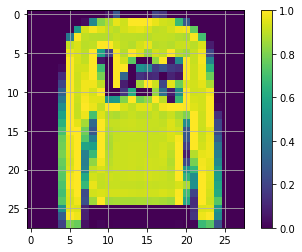

In [54]:
# vamos a inspeccionar la imagen de los datos de evaluación con nuestros propios ojos para ver si
# el modelo ha predecido bien qué tipo de ropa es basándose en el análisis de la imagen.
plt.figure()
plt.imshow(test_images[1]) # CÁMBIAME! :d
plt.colorbar()
plt.grid(True)
plt.show()

In [45]:
test_labels[0]

9

## Verificando Predicciones  
Este script simplifica el proceso y muestra directamente una predicción y su imagen real para poder verificar una imagen.

Hay que corregirlo porque no sale el valor esperado.

Pick a number: 45


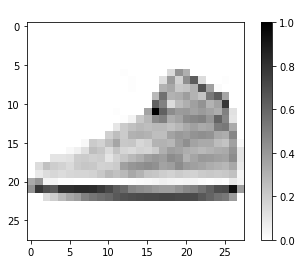

In [56]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)